# CapsNets on Fashion Mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [2]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_fashion_mnist

In [3]:
(X_train, y_train), (X_test , y_test) = load_fashion_mnist(size=(1024, 512))

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

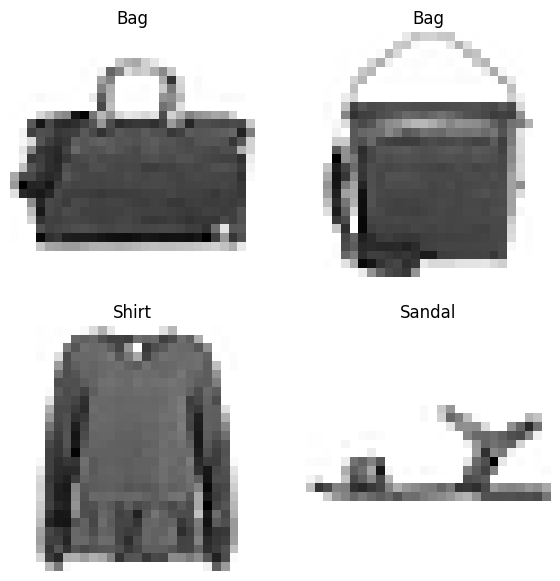

In [5]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [6]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [7]:
params = {
    "epochs": 15,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
}

model = CapsNet(**params)
model._name = "CapsNet-Fashion-MNIST"
model.compile()
model.summary()

Model: "CapsNet-Fashion-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'], validation=(X_test, y_test))

Epoch 1/15: 100%|██████████| 16/16 [00:10<00:00,  3.28it/s, Evaluating ...]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 8/15: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 8 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.6630859375, 0.771484375, 0.783203125, 0.8251953125, 0.826171875, 0.865234375, 0.8828125]),
 'precision': ListWrapper([0.6172799553160054, 0.7743042470747098, 0.7880183180491245, 0.8244528845906616, 0.8432144370975442, 0.8696489619163031, 0.8890123920402717]),
 'recall': ListWrapper([0.6630859375, 0.771484375, 0.783203125, 0.8251953125, 0.826171875, 0.865234375, 0.8828125]),
 'f1': ListWrapper([0.6240028516549718, 0.767865968112947, 0.7738570429864623, 0.8201249895587484, 0.8169848136103279, 0.8632249782581949, 0.8786415998558472]),
 'loss': ListWrapper([0.008681964129209518, 0.003911028616130352, 0.0029332777485251427, 0.002464161952957511, 0.0022098852787166834, 0.001962982350960374, 0.0017786134267225862]),
 'val_accuracy': ListWrapper([0.609375, 0.736328125, 0.74609375, 0.744140625, 0.765625, 0.783203125, 0.791015625]),
 'val_precision': ListWrapper([0.5605306431941965, 0.7292743763503966, 0.7431530280777106, 0.7481069047557054, 0.772462625134368, 0.78655

,precision,recall,f1-score,support
T-shirt/top,0.859649,0.875000,0.867257,56.00000
Trouser,0.896552,0.981132,0.936937,53.00000
Pullover,0.640000,0.450704,0.528926,71.00000
Dress,0.948718,0.804348,0.870588,46.00000
Coat,0.698113,0.637931,0.666667,58.00000
Sandal,0.902439,0.925000,0.913580,40.00000
Shirt,0.418919,0.659574,0.512397,47.00000
Sneaker,0.872340,0.854167,0.863158,48.00000
Bag,0.953488,0.911111,0.931818,45.00000
Ankle boot,0.860000,0.895833,0.877551,48.00000


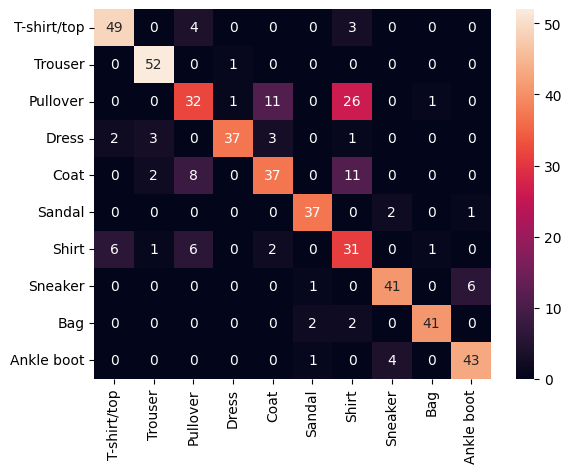

In [9]:
model.evaluate(X_test, y_test, class_names)

## Loading and saving

Saving model under /saved_models/CapsNet-Fashion-MNIST


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-Fashion-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-Fashion-MNIST/assets


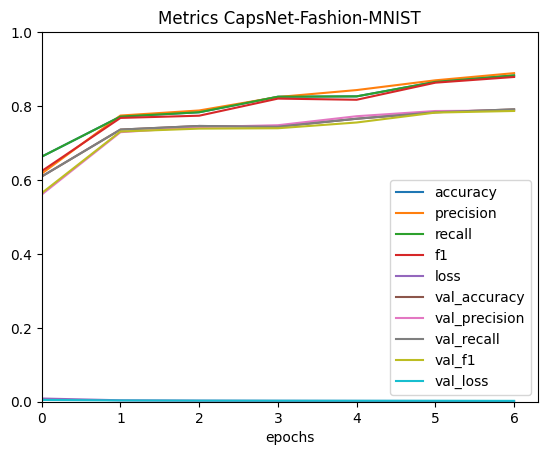

In [10]:
model.save()

In [11]:
loaded_model = tf.keras.models.load_model('../saved_models/CapsNet-Fashion-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "CapsNet-Fashion-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense_2 (Dense)             multiple                  82432     
                                                                 
 dense_3 (Dense)             multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
